# Classification Tutorial

This notebook incorporates the material of the plot_iris_svc.ipynb notebook and therefore supercedes it.

## 1. The data

Let's look at a dataset used in [one of the foundational papers in **linear discriminant analysis** (LDA) by Ronald Fisher](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=0ahUKEwiez6rWgNbOAhVBVWMKHf6WCTAQFgghMAA&url=http%3A%2F%2Frcs.chemometrics.ru%2FTutorials%2Fclassification%2FFisher.pdf&usg=AFQjCNHHtp94F4ypoDjy-708tnsnREUZBw). The data was actually collected by Edgar Anderson in
a study of the morphological variation of iris species (variation due to **shape**).

First we load the data from the `sklearn` module, which contains many tools and datasets
used in machine learning research.

In [57]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

data = load_iris()
features = data['data']
feature_names = data['feature_names']
target = data['target']

In [63]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Two large arrays are defined, `features` and `target`.

The raw data about the irises is in `features`; `features` is a 2D array.

In [2]:
features.shape

(150, 4)

That means we have 150 data exemplars (individual irises), and we have 4 measured attributes for each.  

Here's the first 10 rows

In [37]:
features[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

To understand what the data means,  consider an example iris. Let's take the row
90 rows up from the end of the array.

In [4]:
P = features[-90]
P

array([5. , 2. , 3.5, 1. ])

Looking at feature names, we can decode this:

In [5]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

P is an iris with sepal length 5 cm, sepal width 2 cm, petal length 3.5 cm,
and petal width 1 cm.  All of these are shape attributes.

P also has a class, stored in the `target` array, whose first ten members are:

In [38]:
target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

To find  the class of our example iris, we look at the class of the iris 90 irises up from the last iris:

In [7]:
target[-90]

1

So P belongs to class 1.  It turns out there are three classes, all numerical.  We can see there are 3 classes and what they are by doing the following:

In [39]:
set(target)

{0, 1, 2}

Each number represents a different species of iris, 0 = *I. setosa, 1 = I. versicolor,* and
2 = *I. virginica*. In fact our data has 50 exemplars of each of these 3 species.  So what this data helps us study is variation in **shape attributes** among iris species.

## 2. Plotting attributes

Let's do a picture.

Look at the picture created by the code below and
study it carefully.  

Each of the 6 subplots features a pair of attributes.
For example, we pick **sepal length** amd **sepal width** in the first subplot.
We then represent each iris as
a point out on the 2D xy plane, using the sepal length as the x coordinate and
sepal width as the y-coordinate, and we color it according to its class. 
The 3 classes of iris are rendered as blue, green, and red
points of different shapes.  This is called a **scatter plot**.  The idea is to
see if irises of of the same class cluster together based on the attributes
we're looking at.

One more thing we've done is to distinguish the example point P discussed
above, so that you can see how its representation changes from subplot to
subplot.  P is of class 1; points of class 1 are being drawn as filled in green circles,
but P has been drawn much larger than the other green points.

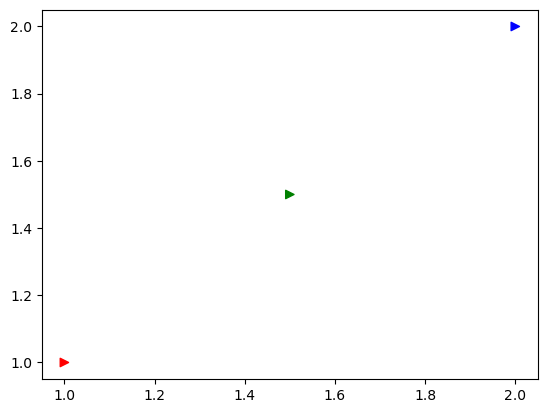

In [58]:
from matplotlib import pyplot as plt

markers, colors  = ">ox", "rgb"
X = [1,1.5,2]

# Scattering all points uniform marking, different colors
plt.scatter(X,X,marker=markers[0],c=list(colors))
# Try out different markers
#plt.scatter(X,X,marker=markers[1],c=list(colors))
#plt.scatter(X,X,marker=markers[2],c=list(colors))

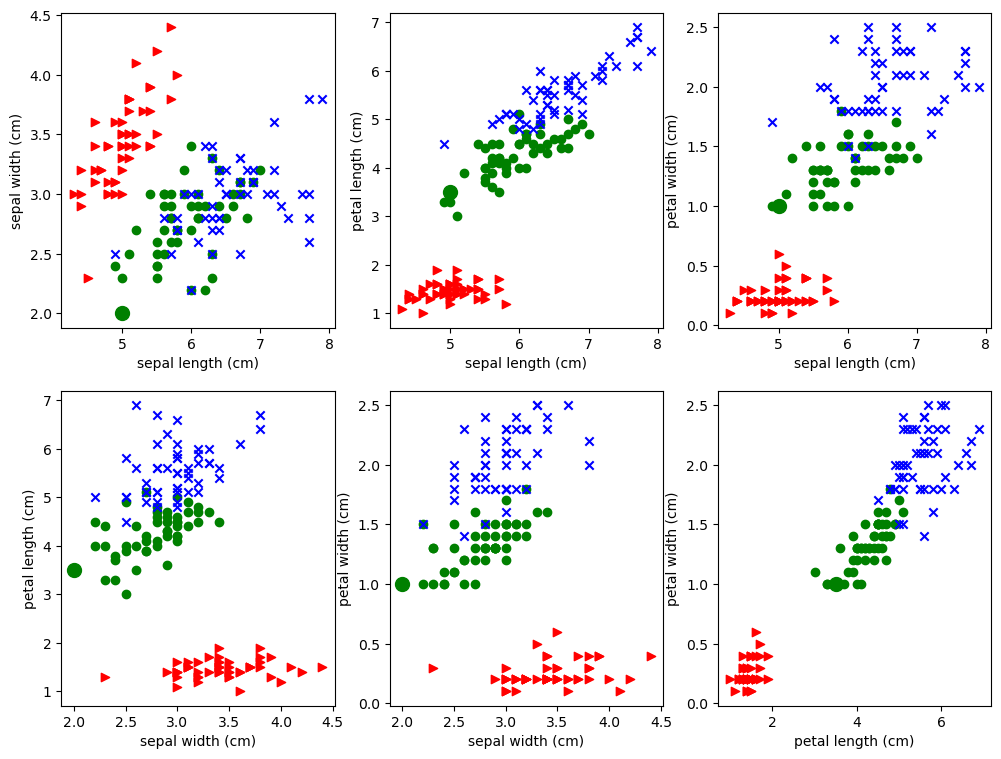

In [59]:
%matplotlib inline

import pylab 
import numpy as np
from matplotlib import pyplot as plt

# Let's make this a big figure, because there are multiple subplots
pylab.rcParams['figure.figsize'] = (12.0, 9.0)


markers, colors  = ">ox", "rgb"
# Four columns, plot two at a time.  
# This is all 6 possible pairings of the indices of the 4 cols
pairs = [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)]
for i,(x,y) in enumerate(pairs):
    # 6 subplots in 2x3 configuration. Each subplot pairs two iris
    # attributes we call x and y. Let's do subplot i+1 now.
    plt.subplot(2,3,i+1)
    # On this subplot we're doing 3 sets of points, each belonging to a different iris class
    # with a different color and shape used to draw the points.  To do the 3 sets, use a loop.
    # To loop through 3 sequences at once, zip them together first
    for cls,marker,clr in zip(range(3),markers,colors):
        plt.scatter(features[target == cls,x], features[target == cls,y], marker=marker, c=clr)
    # Let's draw our point P with attention-getting large SIZE.
    p_features,p_cls  = features[-90],target[-90]
    marker,clr = markers[p_cls], colors[p_cls]
    plt.scatter(p_features[x],p_features[y],marker=marker,c=clr,s=100)
    # Done with P
    # Label this subplot with the names of the two features being studied.
    plt.xlabel(feature_names[x])
    plt.ylabel(feature_names[y])
    # To make it prettier, uncomment the following & remove ticks on the x and y axis.
    #plt.xticks([])
    #plt.yticks([])
 
plt.savefig('iris_datasets_separations.png')

Notice that that big green dot P jumps around from plot to plot. It's being represented with different numerical values each time, so it jumps around the xy-plane.  In the first plot we see its sepal length/ sepal width view, which happens to be the point (5,2).  In the second plot we look at the sepal length/petal length view, which happens to be the point (5,3.5). Six different views as we scoot from subplot to subplot, all coming from the one row in the `features` table that represent P:

```
[ 5. ,  2. ,  3.5,  1. ]
```

## 3.  Linear separation

Now consider the problem of drawing straight lines to **separate** the classes.  First off it's easy to see that it's much easier to separate the red points from the blue and green points than it is to separate the blue points from the green points. As an example let's draw a pretty good line for separating the red points from the others for the second plot in
the first row.  This is the one that plots **sepal length** (x-axis) against **petal 
length** (y axis).  Note that I found the line by eyeballing the plot and using
trial and error.

In [37]:
features[-90]

array([5. , 2. , 3.5, 1. ])

Text(0, 0.5, 'petal length (cm)')

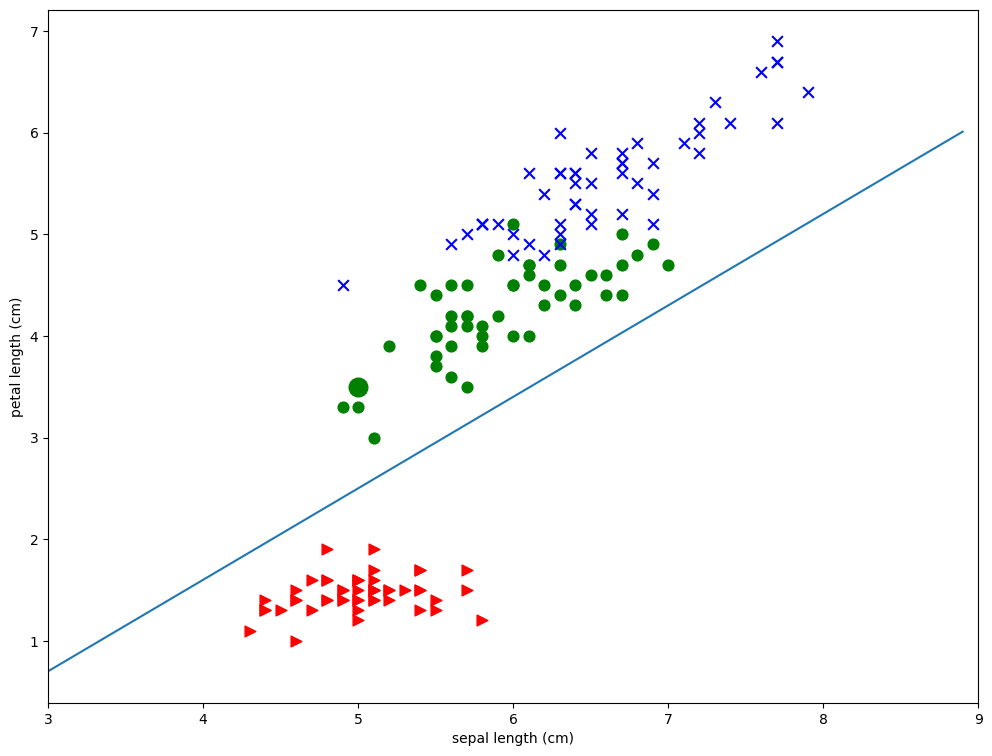

In [64]:
# After some trial & error, I decided on a line specified by the following 2 numbers worked.
# m is the slope, b is where the line intercepts the y axis (not seen in the figure)
(m,b) = (.9,-2)
# The indexes for the two iris features we're using for this plot.
(p0,p1) = (0,2)
# Scatter the data points
for t,marker,c in zip(list(range(3)),">ox","rgb"):
    plt.scatter(features[target == t,p0], features[target == t,p1], 
                marker=marker, c=c,s=60) 
# Let's draw our point P with extra special attention getting large SIZE.
p_features,p_target  = features[-90],target[-90]
marker,clr = ">ox"[p_target], "rgb"[p_target]
plt.scatter(p_features[p0],p_features[p1],marker=marker,c=clr,s=180)
 
# Draw our classifier line
# We'll only draw the portion of the line relevant to the current figure.
(xmin,xmax) = (3.,9.)
# tighten the boundaries on the drawing to the same limits
plt.gca().set_xlim(xmin,xmax)
#Between xmin and xmax, mark off a set of points on the x-axis .1 apart
xvec = np.arange(xmin,xmax,.1)
# Plot a stright line with the chosen slope & intercept
plt.plot(xvec,m*xvec+b)
plt.xlabel(feature_names[p0])
plt.ylabel(feature_names[p1])

To see what this line does,  consider our example iris P.

Let's pretend we don't know the class of P, but we do know
its attributes. So we know $P$ has sepal length 5 and petal length 3.5.  

Let's plot it and use our line as a classifier.

In [39]:
p_target

1

3


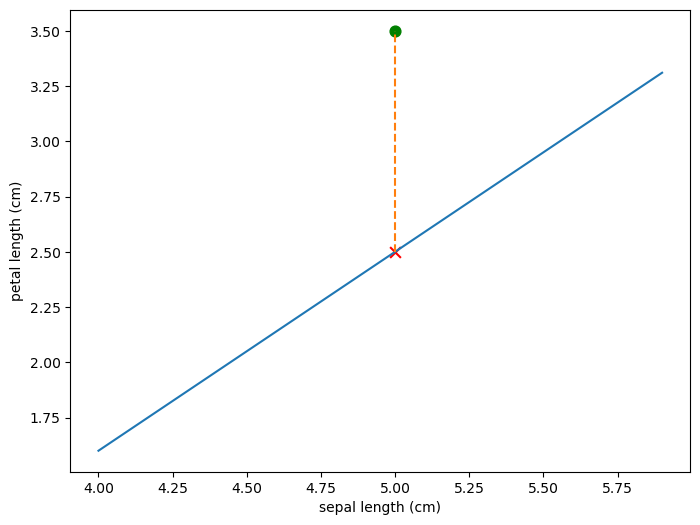

In [46]:
pylab.rcParams['figure.figsize'] = (8.0, 6.0)
# Our sample point
P = features[-90]
(xPrime,yPrime) = (P[0],P[2])
# Boundaries of what we'll draw.
(xmin,xmax) = (4.0,6.0)
# Ticks at which to place points on x- axis
xvec = np.arange(xmin,xmax,.1)
# our classifier line slope and intercept
(m,b) = (.9,-2)
#  Use (m,b) for the EQUATION of the classifier line.  
yvec = m*xvec+b
# Plot the classifier line
plt.plot(xvec,yvec)

# the point on the line below xPrime
yHat = m*xPrime + b
# Plot our example point
plt.scatter(xPrime,yPrime , marker='o', c='g',s=60) 


# Plot a point X below P, directly on the classifier line
plt.scatter([xPrime],[yHat] , marker='x', c='r',s=60) 
xvec2,yvec2 =np.array([xPrime,xPrime]),np.array([yHat,yPrime])
# Plot the dashed line from X to P
plt.plot(xvec2,yvec2,linestyle='--')
# Draw the frame around the plots TIGHT
plt.axis('tight')
plt.xlabel(feature_names[p0])
plt.ylabel(feature_names[p1])

print(y)

The representation of the iris $P$ in this plotting system is shown as the green dot.  Since the dot falls above the line we would classify it as a non-red class iris.  Also shown
(as a red X) is what the petal of length of $P$ would have to be for it to fall directly in the line.

We printed out that value before drawing the plot.  It's 2.5.  Basically for any iris
with sepal length 5, if it's petal length is greater than 2.5 we classify it as non-red;
if it's less than 2.5 we classify it as red.  The line defines a classification rule.

Moreover we can easily extend the rule to any sepal length.  In fact,
we can write a classification rule, using the equation for the line.  Let `(x',y')`
be the point to classify, and let's we call non-red the **positive class**.
Then we place `(x',y')` in the positive class whenever the following 
quantity is positive (see the definition of `yvec` in the code above):

```
y' - (.9x' - 2) = y' -.9x + 2
```

Taking our example point `(x'=5,y'=3.5)`:

```
3.5 - .9*5 + 2 = +1
```

So as desired this is positive, telling us the point falls above the line and should
be classified as non-red.

We have just created a classification rule.  Next we write a function that implements our rule.


In [47]:
def is_non_red (P):
    """
    P is a data point, all 4 attributes.
    
    Return True if P is in positive class.
    """
    return (P[2] - .9*P[0] + 2) > 0\

P = features[-90]
print('P is in positive class: {0}'.format(is_non_red(P)))

P is in positive class: True


## 4.  Relationship to regression

How is what we've done related to regression, especially linear regression?

Well, first of all, in both the linear regression case and the linear discriminant case,
we are using numerical data (a scattering of points) to try to determine a line.

We are defining the line in different ways.  In the linear regression case, we looked 
for the best line to represent the scattering of points we saw. In the linear discrimination
case, we are looking for the best line to **separate** two classes.

Just as it wasn't always possible to find a line that was a good **fit** to our scattering of data, so it isn't always possible separate a scattering of points with a line.

What we're seeing in the plots above is that, taking the features by pairs, we can't see
a good way to separate all 3 classes.

We'll validate this intuition in the next section. We'll use a program that does a kind of linear discrimination; that is, it tries to find linear separations between classes.  Instead of using Fisher's method, which is called Linear Discriminant Analysis (LDA), we'll use
something called **Logistic regression**, which has become far more popular in many applications.  The differences don't matter for our purposes,  but logistic regression is much more likely to be the method of choice in linguistic applications. 

## 5.  Linear classifier results

We're going to use `sklearn` to build a linear classifier to to separate all three classes. We're first going to use just the sepal features, to keep it visualizable.  We'll use a type of linear classifier called  a **Logistic Regression classifier**.

In [21]:
xx[0,:]

array([3.8 , 3.82, 3.84, 3.86, 3.88, 3.9 , 3.92, 3.94, 3.96, 3.98, 4.  ,
       4.02, 4.04, 4.06, 4.08, 4.1 , 4.12, 4.14, 4.16, 4.18, 4.2 , 4.22,
       4.24, 4.26, 4.28, 4.3 , 4.32, 4.34, 4.36, 4.38, 4.4 , 4.42, 4.44,
       4.46, 4.48, 4.5 , 4.52, 4.54, 4.56, 4.58, 4.6 , 4.62, 4.64, 4.66,
       4.68, 4.7 , 4.72, 4.74, 4.76, 4.78, 4.8 , 4.82, 4.84, 4.86, 4.88,
       4.9 , 4.92, 4.94, 4.96, 4.98, 5.  , 5.02, 5.04, 5.06, 5.08, 5.1 ,
       5.12, 5.14, 5.16, 5.18, 5.2 , 5.22, 5.24, 5.26, 5.28, 5.3 , 5.32,
       5.34, 5.36, 5.38, 5.4 , 5.42, 5.44, 5.46, 5.48, 5.5 , 5.52, 5.54,
       5.56, 5.58, 5.6 , 5.62, 5.64, 5.66, 5.68, 5.7 , 5.72, 5.74, 5.76,
       5.78, 5.8 , 5.82, 5.84, 5.86, 5.88, 5.9 , 5.92, 5.94, 5.96, 5.98,
       6.  , 6.02, 6.04, 6.06, 6.08, 6.1 , 6.12, 6.14, 6.16, 6.18, 6.2 ,
       6.22, 6.24, 6.26, 6.28, 6.3 , 6.32, 6.34, 6.36, 6.38, 6.4 , 6.42,
       6.44, 6.46, 6.48, 6.5 , 6.52, 6.54, 6.56, 6.58, 6.6 , 6.62, 6.64,
       6.66, 6.68, 6.7 , 6.72, 6.74, 6.76, 6.78, 6.

In [19]:
yy.shape

(171, 231)

In [23]:
set(tuple(Z.ravel()))

{0, 1, 2}

([], [])

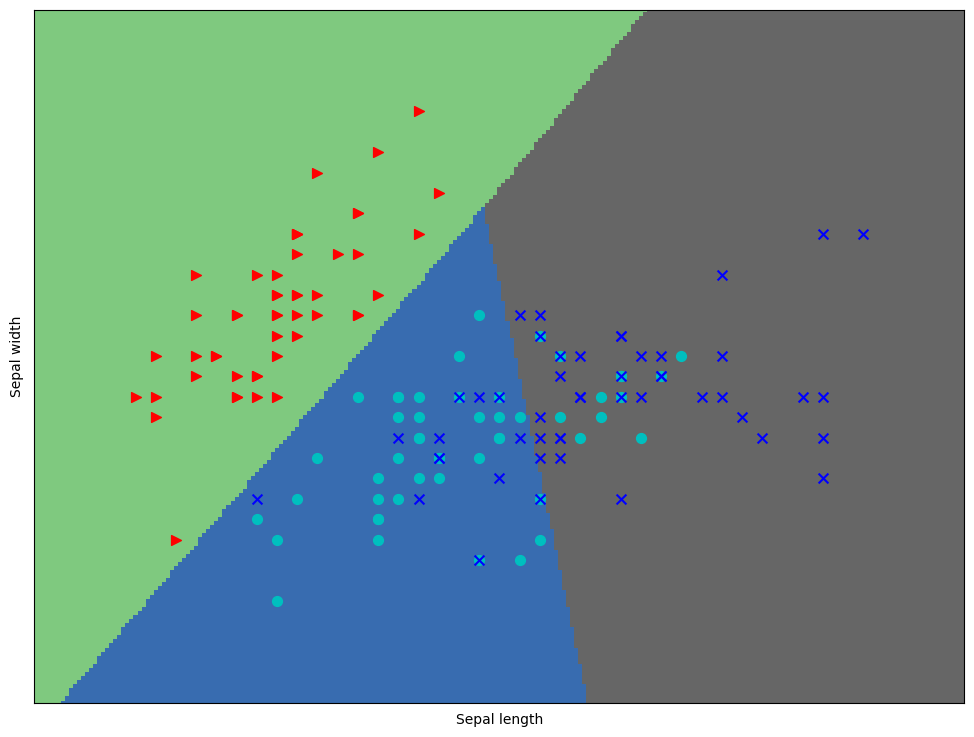

In [60]:
from sklearn import linear_model
#pylab.rcParams['figure.figsize'] = (12.0, 9.0)

#  Use just the first 2 columns as predictors
#  Why?  So we can draw this!
X = features[:,:2]
Y = target



# we create an instance of a Logistic Regression Classifier.
logreg = linear_model.LogisticRegression(C=1e5,solver='lbfgs',multi_class='auto')

# we fit the data.
logreg.fit(X, Y)

markers, colors  = ">ox", "rgb"
# Apply the classifier's decision function to xx,yy.   Z contains
# the predicted classes for the 2D points in the  mesh

# x and y here refer to the x-,y- axis of the drawing below
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh

################################################################
#  Dont worry too  much about this part of the code.  Meshes
#  are a mesh-y topic.  They are the 2D version of aranges.
# xx and yy define a mesh: a rectangular region covering  all of
# the training data X.  xx contains the x coords, yy the y coords.
# xx[0,:] is the x coords of the first row of the rectangle.
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
##  End of meshy stuff xx,yy are the points we're going to classify,±
##  So that we can color entire regions of the plot.

# (conceptually, ALL the points in the 2D region defined by the training data).
# So set(tuple(Z.ravel())) is {0,1,2} the 3 iris classes.
# The result Z is an array storing  the predicted class for every point in xx,yy
# We use .ravel() to flatten out 2D matrices xx and yy to concat into a 2D
# matrix 
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.  We'll color EACH point in xx,yy
# according to its class in Z.
Z = Z.reshape(xx.shape)
# Use a Qualitive Colormap ()
#plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
#plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)
#colors2 = colors
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Accent)
colors2 = 'rcb'
# Also plot the training points, coloring them according to their  TRUE classes.
for cls,marker,clr in zip(list(range(3)),markers,colors2):
        plt.scatter(X[target == cls,0], X[target == cls,1], marker=marker, c=clr, s=50)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

The differently colored regions represent the areas the classifier has reserved for particular classes, and the dots are our training data, colored by species.  We see that all our worries are validated.  The classifier separates the red class off nicely, and has trouble discriminating the darkblue x-class and lightblue cicle-class.  

This coloring also makes it clear that it's not 
really the classifier's problem: These two dimensions are insufficient to discriminate the three species. In the blue and gray regions, look for darkblue Xs
superimposed on lightblue circles.  These are points from our training data that belong to two different species but have exactly the same coordinates in these 2 dimensions. 
In other words, given just the sepal length and sepal width, there is no way to tell these
irises apart.

Can we quantify what's going on? Certainly.

Here's how to find out our score.

In [62]:
from sklearn.metrics import accuracy_score
# Rerun prediction on just the training data.
X = features[:,:2]
# we create an instance of a Logistic Regression Classifier.
logreg = linear_model.LogisticRegression(C=1e5,solver='lbfgs',multi_class='auto')
logreg.fit(X, Y)
predicted = logreg.predict(X)
# Y has the right answers.
accuracy_score(Y,predicted)

0.8333333333333334

Well, we went and cheated by evaluating our score on just the training data,
and we **still** didn't do very well.  Only 80% correct!

Maybe our problem is that we keep using only two features at a time. What if we use **all**
the features at once?  Please note how simple the following code is.  We are basically starting from scratch, using all our data, and all our features, and testing.

## The most important part of this notebook

In [31]:
# Go back to using all 4 features.  Compare the definition of X used the plot above.
X = features
Y = target
logreg = linear_model.LogisticRegression(C=1e5, solver='lbfgs',multi_class='auto')
logreg.fit(X, Y)
predicted = logreg.predict(X)
accuracy_score(Y,predicted)

0.9866666666666667

Yep,  that was our problem.  Our accuracy is now 98%!

And so we pause for a moment to take in one of the central lessons of multivariate statistics.  Using more variables can help.  Bigtime.  It doesn't always help, but as long
as we're getting new independent informatioon from the new features, it's worth
trying.

We started out essentially asking the question, what linear function of two 
of these variables can best separate these classes?  And we tried all possible systems using two features and didn't do very well.  But then we switched to asking what linear function
of all 4 variables can best separate these variables? And we did **much** better.

So why didn't we do this to start with?  And why did the code get so much simpler?

Second question, first, because the two answers are related.  The code got much simpler
because we threw out the visualization code.  And we threw out the visualization code
because we switched to a system that was much harder to visualize.  We essentially went from representing our code in 2 dimensions (so that 
we could plot every point on an the xy plane) to representing it in 4 dimensions.
Try and visualize 4 dimensions!  Pretty hard.  And that's the answer
to the first question.  We didn't do it this way to start with because
we wanted something we could visualize, and that proved helpful, because there
were insights the visualizations gave us, especially about the red class.

And therein lies one problem with switching to 4 dimensions.  We've lost our capacity
to glean insights from the data, at least with the tools we've looked at till now.
We don't really know what relationships got us over the hump in classifying
irises.

So lesson number one is that more variables can help.  And lesson number
two is that there are perils involved in using more variables.  Actually 
we haven't even scratched the surface of the many perils involved in higher-dimensional
data, but we've identified an important one.  Using more variables makes things
more complicated, and that makes it harder to understand what's going on.
At some point we are going to have turn around and explain our results
to an audience waiting with baited breath, and you have be **very** careful when explaining
multivariate results.  Visualization is a big help at explaining complicated
relationships, so losing the ability to visualize is not a small loss,
especially since what real life problems often involve is not yes/no classifications,
but insight.  More on the problem of visualizing higher-dimensional data later in
the course.

In the meantime, to try to recover a little insight into what is going on with
a completely visualizable representation of the iris data, have a look at the appendix.

## Appendix A Using different types of SVM

We will explore some of the consequences of using different types of SVMs in the next notebook (linear_classifier_svm).

Here we just give the flavor of how to use different classifiers (in particular different SVMs)
in `scikit_learn`.

Note:  Inthe figure below there are two plots labeled *SVC with Linear Kernal* 
and Linear SVC (Linear kernel).  I don't really understand how these two models
differ, other than that they are different Support Vector Machine (SVM) implementations
both available in `scikit learn`.

Automatically created module for IPython interactive environment


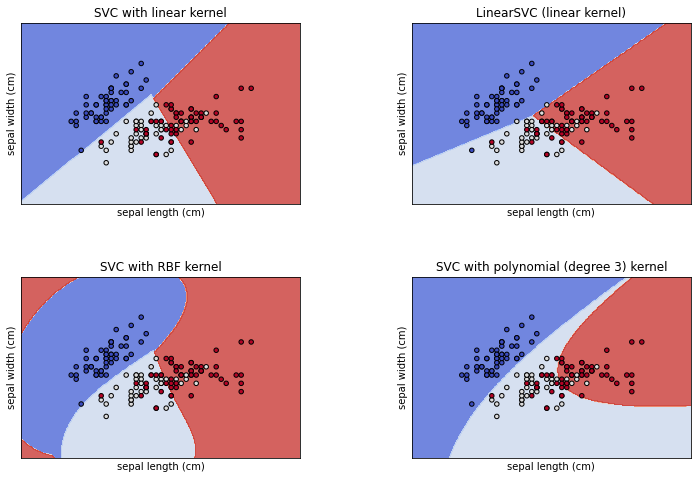

In [12]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. 
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2,figsize=(12,8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

x_att,y_att = 0,1
X0, X1 = X[:, x_att], X[:, y_att]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #ax.set_xlabel('Sepal length')
    #ax.set_ylabel('Sepal width')
    ax.set_xlabel(iris.feature_names[x_att])
    ax.set_ylabel(iris.feature_names[y_att])
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

#### Gaussian Classifiers

#### Notes on hacking numpy arrays

In [67]:
import numpy as np

# Cook up random 1d array
a_1D = np.random.rand(4,)

# make it 4 x 1
a_nrows = a_1D.shape[0]
a_2D = a_1D.reshape((a_nrows,1))

In [68]:
a_1D

array([0.82785793, 0.02199211, 0.02607832, 0.18824968])

In [69]:
a_1D.shape

(4,)

In [70]:
a_2D

array([[0.82785793],
       [0.02199211],
       [0.02607832],
       [0.18824968]])

In [10]:
a_2D.shape

(4, 1)

In [71]:
# Cook up random 2d arrays of different shapes
b_2D_1 = np.random.rand(4,2)
b_2D_2 = np.random.rand(4,3)
b_2D_3 = np.random.rand(2,2)

In [72]:
b_2D_1

array([[0.58968585, 0.3780283 ],
       [0.92069582, 0.64670967],
       [0.717604  , 0.2530142 ],
       [0.08233576, 0.34751584]])

In [73]:
b_2D_2

array([[0.44547243, 0.85595194, 0.99244395],
       [0.59038664, 0.99123087, 0.40637481],
       [0.86445582, 0.25160339, 0.11395818],
       [0.98553047, 0.89830304, 0.52353679]])

In [74]:
b_2D_3

array([[0.74797376, 0.539302  ],
       [0.87940524, 0.64808369]])

Concatenate columnwise

In [49]:
np.hstack([b_2D_1, b_2D_2])

array([[0.50243424, 0.9311518 , 0.98214676, 0.58644108, 0.39514477],
       [0.70095486, 0.29907664, 0.38201942, 0.44371491, 0.83550265],
       [0.14189844, 0.160513  , 0.8608271 , 0.18844577, 0.71184684],
       [0.01641225, 0.3151915 , 0.02145551, 0.06931183, 0.69261826]])

In [154]:
b_2D_1.shape, b_2D_2.shape

((4, 2), (4, 3))

In [71]:
b_2D_3

array([[0.30351754, 0.76798279],
       [0.5141392 , 0.9277491 ]])

A Value error. Hstacking 4x2 wiwth 2X2.  Num rows must gree.

In [74]:
#np.hstack([b_2D_1, b_2D_3])

A Value error because b_2D_1 and a_1D do not have the same number of dimensions
(2D vs 1D)

In [35]:
#np.hstack([b_2D_1, a_1D])

Concatenating rowwise. 4x2 with 2x2 ok.  Num cols agrees.

In [75]:
np.vstack([b_2D_1, b_2D_3,])

array([[0.58968585, 0.3780283 ],
       [0.92069582, 0.64670967],
       [0.717604  , 0.2530142 ],
       [0.08233576, 0.34751584],
       [0.74797376, 0.539302  ],
       [0.87940524, 0.64808369]])

Equivalently use `np.concatenate`

In [64]:
# concat 4x2 with 2x2.  Rowwise concat (like vstack)
np.concatenate([b_2D_1, b_2D_3,])

array([[0.51743987, 0.81270196],
       [0.62356152, 0.15820932],
       [0.55381664, 0.10131331],
       [0.85201144, 0.01164034],
       [0.30351754, 0.76798279],
       [0.5141392 , 0.9277491 ]])

In [66]:
# concat 4x2 with 4x3
# Default value for axis is 0. So this is a value error w/o axis=1
np.concatenate([b_2D_1, b_2D_2,],axis=1)

array([[0.51743987, 0.81270196, 0.40230919, 0.07547772, 0.95227653],
       [0.62356152, 0.15820932, 0.37852094, 0.96461176, 0.92121527],
       [0.55381664, 0.10131331, 0.05654117, 0.9910145 , 0.03333896],
       [0.85201144, 0.01164034, 0.31244837, 0.20161952, 0.53110018]])

#### Recognizing adjectives

We train a  classifier to recognize adjectives just by their word shape, inspired
by little word clusters like the following:

```
curious
odious
ruinous
heinous
```

or 

```
possible
miserable
doable
bankable
visible
````

or 

```
baggy
squishy
funky
briny
spikey
```

or 

```
salient
extant
constant
divergent
urgent
important
```

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy as np

In [4]:
import nltk
nltk.download('brown')
nltk.download('universal_tagset')

[nltk_data] Downloading package brown to /Users/gawron/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/gawron/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [5]:
from nltk.corpus import brown
brown_tagged = brown.tagged_words(tagset='universal')
digit = set('01234567879')
tagged_vocab = sorted(list(set(brown_tagged)))
empty = set()
punct = set("\":+;&()*\$\.\,\!/?'-")

adj_vocab = [(word,1) for (word,tag) in tagged_vocab if (tag=='ADJ') 
               and digit.intersection(word) == empty
               and punct.intersection(word) == empty
              ]
other_vocab = [(word,0) for (word,tag) in tagged_vocab if (tag !='ADJ') 
               and digit.intersection(word) == empty
               and punct.intersection(word) == empty
               ]
print(len(adj_vocab))
print(len(other_vocab))

6518
43468


In [6]:
print(len(brown_tagged),len(tagged_vocab))
brown_tagged[:20]

1161192 59962


[('The', 'DET'),
 ('Fulton', 'NOUN'),
 ('County', 'NOUN'),
 ('Grand', 'ADJ'),
 ('Jury', 'NOUN'),
 ('said', 'VERB'),
 ('Friday', 'NOUN'),
 ('an', 'DET'),
 ('investigation', 'NOUN'),
 ('of', 'ADP'),
 ("Atlanta's", 'NOUN'),
 ('recent', 'ADJ'),
 ('primary', 'NOUN'),
 ('election', 'NOUN'),
 ('produced', 'VERB'),
 ('``', '.'),
 ('no', 'DET'),
 ('evidence', 'NOUN'),
 ("''", '.'),
 ('that', 'ADP')]

In [7]:
print(len(other_vocab),len(adj_vocab))
adj_vocab[:10]

43468 6518


[('Abnormal', 1),
 ('Aboveground', 1),
 ('Abstract', 1),
 ('Acceptable', 1),
 ('Accidental', 1),
 ('Acoustical', 1),
 ('Active', 1),
 ('Actual', 1),
 ('Additional', 1),
 ('Adequate', 1)]

In [9]:
other_vocab[:10]

[('A', 0),
 ('A', 0),
 ('A', 0),
 ('AA', 0),
 ('AAA', 0),
 ('AB', 0),
 ('ABC', 0),
 ('ABO', 0),
 ('ACS', 0),
 ('ACTH', 0)]

In [6]:
# CountVectorizer:  Read up on the diff between analyzer char and char_wb.
# As an example, with bigram features: analyzer char_wb given "Mark" will yield "k " 
# as a feat and the corresponding feature will be "k" with char.  Essentially
# char_wb pads peripheral chars, thereby introducing word boundary information.
# Since feat "a " means "a" as the last letter, this rep allows clf to learn
# this as a female name cue.

#cv = CountVectorizer(ngram_range=(1,2),analyzer='char_wb')
#cv = CountVectorizer(ngram_range=(2,3),analyzer='char_wb')
cv = CountVectorizer(ngram_range=(2,4),analyzer='char_wb')

data = adj_vocab + other_vocab
# A squence of strings; a sequence of labels
words, tags = zip(*data)

X_train, X_test, y_train, y_test = \
  train_test_split(words, tags, test_size=0.05, random_state=42)

##  Train it to learn a fixed set of features
X_train_m = cv.fit_transform(X_train)

## Now use only those features on the test set
X_test_m = cv.transform(X_test)

In [43]:
dir(np)

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Tester',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_CopyMode',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__deprecated_attrs__',
 '__dir__',
 '__doc__',
 '__expired_functions__',
 '__file__',
 '__getattr__',
 '__git_version__',
 '__loader__',
 '__mkl_version__',
 '__name__',
 '__packag

In [42]:
np.to_dense(X_train).shape

AttributeError: module 'numpy' has no attribute 'to_dense'

In [35]:
len(cv.get_feature_names_out())

40032

In [7]:
for ft in cv.get_feature_names_out()[10000:10050]:
    print(ft)

dubl
dubo
duc
duc 
duca
duce
duci
duck
ducl
duct
dud
dud 
dudl
duds
due
due 
dued
duel
dues
duet
duf
duf 
duff
dufr
dug
dug 
duga
dugn
dugo
duh
duh 
duha
dui
duin
duis
duit
duk
duke
dul
dula
dulc
dule
dulg
duli
dull
dulo
dult
dulu
duly
dum


In [45]:
X_train_m.shape

(47486, 40032)

In [46]:
X_train_m.todense()[0,:].sum()

21

In [48]:
#clf = MultinomialNB()
#clf = RidgeClassifier()
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train_m, y_train)

# Test
y_predicted = clf.predict(X_test_m)

# Optional but convenient below
y_test = np.array(y_test)
accuracy_score(y_predicted,y_test)

0.9288

This Accuracy score is not as impressive as it looks at first.

Note the percentage of non adjectives is:

In [51]:
1- sum(y_train)/len(y_train)

0.8691403782167375

And slightly greater in the test set:

In [52]:
1- sum(y_test)/len(y_test)

0.8784

which means one can acheive an accuracy of nearly 88% by always guessing nonAdj.

A somewhat more promising evaluation is the following informal one:

In [9]:
ticklers = ['onerous','wettest', 'salient', 'farmable','kinky','exultant','sextant']
test2 = cv.transform(ticklers)
clf.predict(test2)

array([1, 1, 1, 1, 0, 1, 1])

In [10]:
[wd for wd in ticklers if wd in X_train]

[]

##  Precision,  Accuracy, and Recall

The next cell takes the first step toward testing a classifier a little more seriously.  It defines some code for evaluating classifier output.  The evaluation metrics defined are precision, recall, and accuracy.  Call the examples the system predicts to be positive (whether correctly or not) ppos and and the examples it predicts to be negative pneg; consider the following performance on 100 examples:


$$\begin{array}[t]{ccc} &  ppos &pneg\\ pos& 31 & 14\\ neg & 5  & 50 \end{array}$$

The performance of the system has been sorted into 4 classes:


$$\begin{array}[t]{ccc} &  ppos &pneg\\ pos& tp & fn\\ neg & fp & tn \end{array}$$


The $tp$ and $tn$ examples (true positive and true negative) are those the system labeled correctly,
while $fp$ and $fn$ (false positive and false negative) are those labeled incorrectly.
Let N stand for the total number of examples,
100 in our case. 

The three most important measures of system performance are:
  
  1. **Accuracy**: Accuracy is the percentage of correct examples out of the total corpus 

  $$\text{Acc} = \frac{tp+tn}{N} = \frac{31 +50}{100}$$ 
  
  This is .81 in our case.

  2. **Precision**: Precision is the percentage of true positives out of all positive guesses the system made 
  
  $$\text{Prec}=\frac{tp}{pp} = = \frac{tp}{tp + fp} =  \frac{31}{31+5}.$$
  
  This is .86 in our case.  Precision is sometimes called **positive predictive value**.
  
  3. **Recall**: Recall is the percentage of true positives out of all positives (the True Positive Rate,
  used in computing AUC score below):
  
  $$\text{Rec} = \text{TPR}  = \frac{tp}{p} = \frac{tp}{tp + fn} = \frac{31}{31+14}.$$
  
  This is .69 in our case. Recall is sometimes called **sensitivity** or **hit rate** or simply **true positive rate**. It can be described as the probability that a relevant instance will be tagged as relevant.
  
  4.  **False Negative Rate**:  

  $$ \text{FNR} = \frac{fn}{tp + fn} = \frac{31}{31+14} = 1 - Rec $$
  
  5. **False Positive Rate** (used in computing AUC score below)
  
   $$ \text{FPR} = \frac{fp}{fp + tn} = \frac{31}{31+14} = 1 - TNR $$

In [49]:
# Eval metrics
precision_a = precision_score(y_test,y_predicted)
recall_a = recall_score(y_test,y_predicted)
precision_o = precision_score(y_test,y_predicted,pos_label=0)
recall_o = recall_score(y_test,y_predicted,pos_label=0)

print(f"Precision(adj): {precision_a:.2f} Recall(adj): {recall_a:.2f}")
print(f"Precision(non): {precision_o:.2f} Recall(non): {recall_o:.2f}")

Precision(adj): 0.76 Recall(adj): 0.60
Precision(non): 0.95 Recall(non): 0.97


#### Results

Multinomial NB

```
Precision(adj): 0.58 Recall(adj): 0.61
Precision(non): 0.95 Recall(non): 0.94
```

Ridge

```
Precision(adj): 0.71 Recall(adj): 0.62
Precision(non): 0.95 Recall(non): 0.96
```

Log. Regr:

```
Precision(adj): 0.76 Recall(adj): 0.60
Precision(non): 0.95 Recall(non): 0.97
```

In [12]:
###         | ppos    pneg
### ------------------------------
###   pos   |  tp       fn 
###   neg   |  fp       tn

#array([[ 182,  122],
#     [  56, 2140]])

cm = confusion_matrix(y_test,y_predicted,labels=[1,0])
cm

array([[ 182,  122],
       [  56, 2140]])

Display can be facilitated using pandas, with color optionally added.

In [13]:
import pandas as pd
cm_df = pd.DataFrame(cm,columns = ('ppos','pneg'),index=('pos','neg'))
cm_df.style.background_gradient(cmap='Blues')

,ppos,pneg
pos,182,122
neg,56,2140


Also of use are the two normalized confusion matrices:

Normalizing by row, so 
is the value in the pos row,ppos columm **recall** or **precision**?

$$
182/(182 + 122)  = tp/(tp + fn)
$$

What percentage of the positives did we predict to be positive.

In [14]:
cm_n = confusion_matrix(y_test,y_predicted,normalize='true',labels=[1,0])
cm_n_df = pd.DataFrame(cm_n,columns = ('ppos','pneg'),index=('pos','neg'))
#cmap=plt.cm.Blues,
cm_n_df.style.background_gradient(cmap='Blues')

,ppos,pneg
pos,0.598684,0.401316
neg,0.025501,0.974499


Normalizing by column, so 
is the value in the pos row,ppos columm **recall** or **precision**?

$$
182/(182 + 56) = tp/(tp + fp)
$$

What percentage of our positive predictions were true positives?

In [15]:
cm_n = confusion_matrix(y_test,y_predicted,normalize='pred',labels=[1,0])
cm_n_df = pd.DataFrame(cm_n,columns = ('ppos','pneg'),index=('pos','neg'))
cm_n_df.style.background_gradient(cmap='Blues')

,ppos,pneg
pos,0.764706,0.053935
neg,0.235294,0.946065


### Discrimination threshholds

The default **decision rule** for logistic regression: if the probability of the positive class is
greater than .5 for test instance $i$, classify $i$ as a positive instance.

We call .5 the **discrimination threshhold value**
or just **threshhold value**

In [214]:
##  Set print to ffloat format precision = 3
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

y_prob = clf.predict_proba(X_test_m)
y_prob[40:50,1]np.a

array([0.002, 0.976, 0.836, 0.   , 0.   , 0.022, 0.001, 0.322, 0.   ,
       0.001])

In [215]:
y_predicted = clf.predict(X_test_m)
y_predicted[40:50]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

A new decision rule. Lower the discrimination threshhold.  

In [46]:
def predict_with_prob_threshhold(clf, threshhold=.5):
    y_prob = clf.predict_proba(X_test_m)
    return y_prob[:,1] >= threshhold

If we lower the threshhold to .4, more instances classified as **positive**.

In [50]:

y_predicted1 = predict_with_prob_threshhold(clf, threshhold=.4)

print(y_predicted.sum(), y_predicted1.sum())
print(y_predicted1.sum() - y_predicted.sum())

238 286
48


This is what will happen in general as long we lower the threshhold **enough** to increase `tp`.

With more instances classified as positive, what happens to **recall** (true positive rate)?


$$\text{Rec} = \text{TPR}  = \frac{tp}{p}= \frac{tp}{tp + fn}.$$
  

$$\begin{array}[t]{ccc} &  pos &neg\\ ppos& tp & fp\\ pneg & fn & tn \end{array}$$


Since the number of positives isn't being changed, (we didn't change `y_test`),
the only way for the true positive rate to go up by 48 is for the false negatives to go down by 48.
When the number of detected positives goes up, the number
of missed positives (false negatives) goes down by the same amount.

So when we lower the threshhold for classifying something as positive enough to
make $tp$ go up,  $p$ still remains the same.  Therefore, recall must  ???


```
a. go up
b. remain the same
c. go down
```


In [51]:
# Original scores
precision_a = precision_score(y_test,y_predicted)
recall_a = recall_score(y_test,y_predicted)

print(f"Precision(adj): {precision_a:.2f} Recall(adj): {recall_a:.2f}")

Precision(adj): 0.76 Recall(adj): 0.60


In [52]:
precision1_a = precision_score(y_test,y_predicted1)
recall1_a = recall_score(y_test,y_predicted1)


What happens to recall?

In [53]:
recall1_a = recall_score(y_test,y_predicted1)

print(f"Recall(adj): {recall_a:.2f}; Recall with .4 threshhold: {recall1_a:.2f}")

Recall(adj): 0.60; Recall with .4 threshhold: 0.65


What happens to precision?

$$Prec= \frac{tp}{pp}= \frac{tp}{tp + fp}.$$

We're changing $pp$ by directly changing $tp$, but in general 
there will be a side effect of increasing $fp$ as well!

The amount of change depends on the specific numbers, and very specifically on how much the
false positive rate goes up.

In our system

In [22]:
precision1_a = precision_score(y_test,y_predicted1)
print(f"Precision(adj): {precision_a:.2f}; Precision with .4 threshhold: {precision1_a:.2f}")

Precision(adj): 0.76; Precision with .4 threshhold: 0.69


So precision went down.

Let's look at different hypothetical cases:

No fp increase (every additional pp is a tp).

Precision goes up:

In [23]:
1/4, 2/5,3/6,4/7

(0.25, 0.4, 0.5, 0.5714285714285714)

But mostly this is what happens.  We gain tps at the cost of more fps:

In [24]:
1/4, 2/8,2/9,2/10

(0.25, 0.25, 0.2222222222222222, 0.2)

(100, 2500)
(2500,)


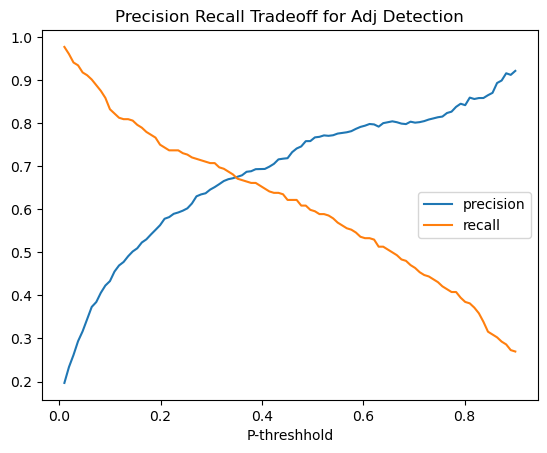

In [25]:
threshholds = np.linspace(0.01, .90, 100)
predictions = np.array([predict_with_prob_threshhold(clf, threshhold=threshhold) 
                        for threshhold in threshholds])
print(predictions.shape)
print(y_test.shape)
prec_scores =\
    np.apply_along_axis(lambda y_pred:precision_score(y_test, y_pred), 1, predictions)
rec_scores =\
    np.apply_along_axis(lambda y_pred:recall_score(y_test, y_pred), 1, predictions)
plt.plot(threshholds, prec_scores, label="precision")
plt.plot(threshholds, rec_scores, label="recall")
plt.title("Precision Recall Tradeoff for Adj Detection")
plt.xlabel("P-threshhold")
plt.legend()

Note that not all classifiers are probability-based; therefore not all will have a `predict_proba` method.

The ridge classifier is a variety of Support Vector Machine (SVM); the learning objective
is to find a hyperplane that maximizes the margin (the distance between the plane
and the nearest examples).  In place of `predict_proba` it has a `'decision_function` method
which returns confidence scores for each sample

>The confidence score for a sample is proportional to the signed distance of that sample to the hyperplane.

In other words, the further a point is  away from the separating plane, the more
confident the classifier is about a positive/negative decision.  The AUC score
can be just as easily computed with a sequence of confidence scores as it is
with a sequence of probabilities.

###  AUC score

ROC stands for **Receiver Operating Characteristic** (understanding
the name involves a little historical context we'll skip for now).   What it
denotes is a classifier-specific function which returns
the recall (or true positive rate) $t$ it achieves
for any given level of false positive rate (FPR) $f$.  Generally, adjusting the threshhold to
tolerate a higher level of $f$ earns
a higher rate of $p$ in return, so 
plotting the function, we get something like the plot below,
which arcs above the line $p=f$.
The plot is for Logistic Regression's performance
on the adjective detection problem.

The line $p=f$ defines random performance.   A classifier that adds one false positive
for each true positive gained 
has no  power to discriminate
among the new predicted-positive instances.
On the other hand an FPR of zero, and a TPR of one
(the top left corner of the plot) 
means perfect recall, ideal performance.
The closer the curve of the ROC function
gets to passing through that point, the better
the classifier.  More mathematically,
the greater the area of the curve under the 
ROC function, the better the classifier.

So here is one way of evaluating
classifiers which doesn't take any particular
stand on how the precision/recall 
trade-off should be managed:
Measure the area under the ROC curve.
An AUC score of .5 is the area
under the $p=f$-line, which signals
random performance.  
An AUC score of 1 denotes the area
inside the square with corners at $(0,0)$ and $(1,1)$, 
which signals perfect performance.  

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score


clfs = {"Logistic Regression": LogisticRegression(solver='liblinear'),
        "Ridge Classifier":   RidgeClassifier(solver='sparse_cg'),
        "Multinomial NB" : MultinomialNB(),
        "Passive Aggressive Classifier": PassiveAggressiveClassifier(loss="squared_hinge")
        #"Passive Aggressive Classifier": PassiveAggressiveClassifier(loss="hinge")
       }



class_of_interest, pos_lbl = 'Adj',1

def do_auc_plot (classifier, y_test, y_scores, pos_lbl, class_of_interest, color="darkorange"):
    
    RocCurveDisplay.from_predictions(
        y_test,
        y_scores, # probs for the class of interest
        name=f"{class_of_interest}",
        color=color
    )
    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    #score_str = f"AUC: {roc_auc_score(y_test, y_scores_1D):.3f}"
    #plt.title(f"ROC curve {clf_name}: {score_str}")
    plt.title(f"ROC curve {clf_name}")
    plt.legend()
    
    

Initialize the dictionary that will hold our **evaluation results**.

In [27]:
auc_scores = {clf:0  for clf in clfs.keys()}

The y-axis is TPR (a synonym for what? recall or precision?).

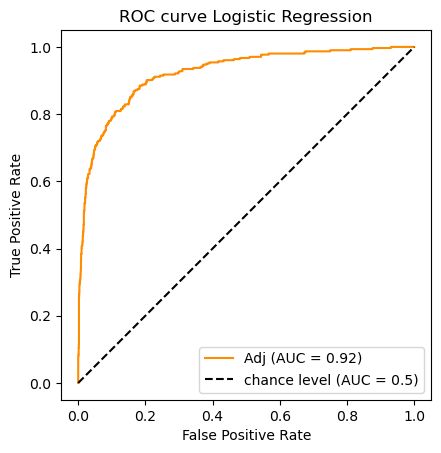

In [28]:
clf_name = 'Logistic Regression'
classifier = clfs[clf_name]
y_scores = classifier.fit(X_train_m, y_train).predict_proba(X_test_m)[:,1]
#  This gives log probs
#y_scores0 = classifier.fit(X_train_m, y_train).decision_function(X_test_m)#[:,1]
auc_scores[clf_name] = (classifier.predict(X_test_m),roc_auc_score(y_test, y_scores))
do_auc_plot (classifier, y_test, y_scores, 1, 'Adj')

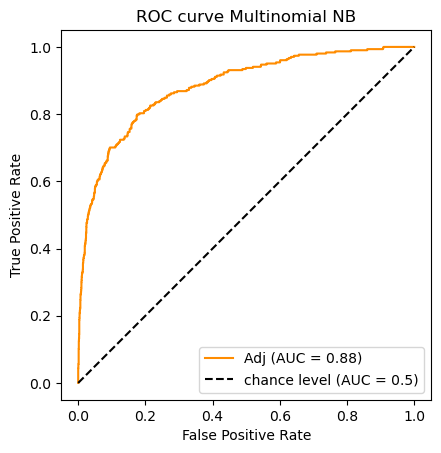

In [29]:
clf_name = 'Multinomial NB'
classifier = clfs[clf_name]
y_scores = classifier.fit(X_train_m, y_train).predict_proba(X_test_m)[:,1]
auc_scores[clf_name] = (classifier.predict(X_test_m),roc_auc_score(y_test, y_scores))
do_auc_plot (classifier, y_test, y_scores, 1, 'Adj')

Note that not all classifiers are probability-based; therefore not all will have a `predict_proba` method.

The *Ridge Classifier* is a variety of Support Vector Machine (SVM); the learning objective
is to find a hyperplane separating positive from
negative examples that maximizes the **margin** (the distance between the plane
and the nearest examples).  In place of `predict_proba` the Ridge Classifier
has a `decision_function` method
which returns confidence scores for each sample:

>The confidence score for a sample is proportional to the signed distance of that sample to the hyperplane.

In other words, the further a point is  away from the separating plane, the more
confident the classifier is about a positive/negative decision.  The AUC score
can be just as easily computed with a sequence of confidence scores as it is
with a sequence of probabilities.

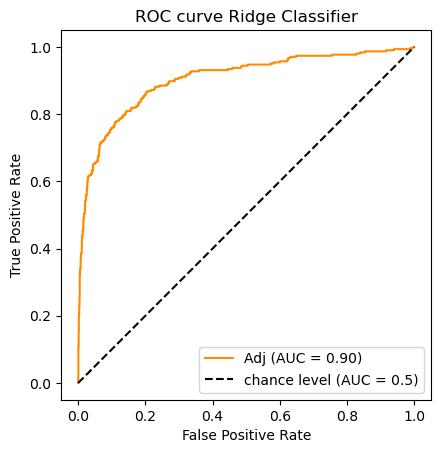

In [30]:
clf_name = 'Ridge Classifier'
classifier = clfs[clf_name]
#  Note The ridge classifier does not assign probabilities.
#  But it does compute scores available from its decision function
y_scores = classifier.fit(X_train_m, y_train).decision_function(X_test_m)
auc_scores[clf_name] = (classifier.predict(X_test_m),roc_auc_score(y_test, y_scores))
do_auc_plot (classifier, y_test, y_scores, 1, 'Adj')

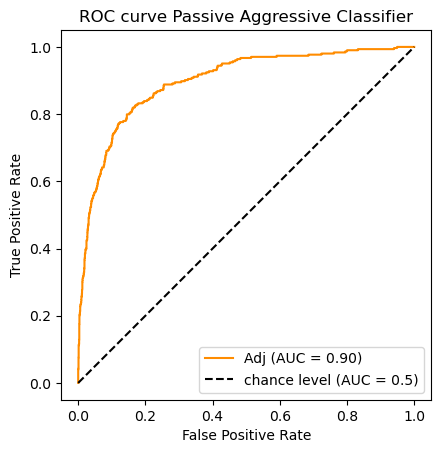

In [31]:
clf_name = 'Passive Aggressive Classifier'
classifier = clfs[clf_name]
y_scores = classifier.fit(X_train_m, y_train).decision_function(X_test_m)#[:,1]
auc_scores[clf_name] = (classifier.predict(X_test_m),roc_auc_score(y_test, y_scores))
do_auc_plot (classifier, y_test, y_scores, 1, 'Adj')

Reviewing the AUC numbers we got:

In [32]:
auc_scores.keys()

dict_keys(['Logistic Regression', 'Ridge Classifier', 'Multinomial NB', 'Passive Aggressive Classifier'])

In [65]:
[auc_scores[k][1] for k in auc_scores]

[0.92267115449142, 0.9033162867893777, 0.8822312997315694, 0.8969455529191832]

So according to the AUC metric the classifiers rank as follows:

$$
\begin{array}[t]{llc}
& \text{Classifier} & \text{AUC}\\ 
\hline 
1. & \text{Logistic Regression} & .923\\ 
2. & \text{Ridge Classifier} & .903 \\ 
3. & \text{Passive Aggressive Classifier} & .896 \\
3. & \text{Multinomial Naive Bayes}& .882 
\end{array}
$$



Meanwhile, looking back at precision and recall for the the same classifiers,
Passive Aggressive Classifier has the best recall and Logistic Regression the best precision.

Looking for the balance between precision and recall, we use `f1_score`, which is their
harmonic mean (harmonic means are appropriate for takinbg
averages of **rates**). Logistic Regression the best f1 score.

In [34]:
for (clf,(y_predicted,_auc)) in auc_scores.items():
    rec = recall_score(y_test,y_predicted)
    prec = precision_score(y_test,y_predicted)
    f_sc = f1_score(y_test,y_predicted)
    print(f"{clf:<40}  {rec:.3f}  {prec:.3f}  {f_sc:.3f}")

Logistic Regression                       0.599  0.765  0.672
Ridge Classifier                          0.618  0.709  0.661
Multinomial NB                            0.605  0.584  0.595
Passive Aggressive Classifier             0.599  0.583  0.591


#### An evaluation experiment

Another evaluation loop.  There are actually  a lot of classifiers concealed under the
name `SGDClassifier`.  SGD refers to a learning method (Stochastic Gradient Descent).
By folding different "loss" functions (learner scoring functions) into the algorithm
you get different kinds of linear learners; `log_loss` gets you a logistic regression
classifier; `hinge` gets you a classic SVM; `perceptron` is another loss function
defining a different kind of linear learner called a **perceptron**. Say the docs

>The other losses, ‘squared_error’, ‘huber’, ‘epsilon_insensitive’ and ‘squared_epsilon_insensitive’ are designed for regression but can be useful in classification as well; see [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressorfor) a description.

The brief experiment below illustrates the idea of evaluating multiple learners on a fixed problem,
alhough we are completely avoiding the important issue of cross-validation, which will be discussed
when we get to text classification.

You can see "squared error" does the worst, but it also fails to converge on a model.
As for the best,  it depends on your criteria.  If recall is the most important
thing, the regression method modifed huber does best, if it's precision, you want logistic regression.
Note that the recall score on this logistic regression classifier is not as good
as the one we got above with sklearn's `LogisticRegression` classifier (.60), which
used the `liblinear` learner.  It's not at all clear why

In [48]:
from  sklearn.linear_model import SGDClassifier

loss_fns = ("hinge", "log_loss",  "modified_huber", 
            "perceptron", "huber", "epsilon_insensitive", 
            "squared_error", )

auc_scores2 = dict()

for fn in loss_fns:
    clf_name = f'SGD Classifier {fn}'
    print(clf_name)
    classifier = SGDClassifier(loss=fn)
    y_scores = classifier.fit(X_train_m, y_train).decision_function(X_test_m)
    y_predicted = classifier.predict(X_test_m)
    auc = roc_auc_score(y_test, y_scores)
    rec =  recall_score(y_test,y_predicted)
    prec =  precision_score(y_test,y_predicted)
    auc_scores2[clf_name] = (y_scores,auc,rec,prec)
    #do_auc_plot (classifier, y_test, y_scores, 1, 'Adj')

SGD Classifier hinge
SGD Classifier log_loss
SGD Classifier modified_huber
SGD Classifier perceptron
SGD Classifier huber
SGD Classifier epsilon_insensitive
SGD Classifier squared_error


/Users/gawron/opt/anaconda3/envs/p310/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [109]:
il = list(auc_scores2.items())
il.sort(key = lambda x:x[1][1], reverse=True)

for (clf, (y_scores, auc,rec,prec)) in il:
    print(f"{clf[15:]:<30} {auc:.3f}  {rec:.3f}  {prec:.3f}")

log_loss                       0.922  0.539  0.785
modified_huber                 0.917  0.628  0.702
hinge                          0.910  0.576  0.771
perceptron                     0.896  0.579  0.624
huber                          0.869  0.441  0.757
epsilon_insensitive            0.856  0.530  0.745
squared_error                  0.543  0.490  0.137


#### Working with confusion matrixes

The confusion matrix we used in the section entitled of Precision, Recall and Accuracy was displaying
classifier decisions in a two-class problem.  The information displayed can be even more
illuminating on a multiclass problem, and scikit learn provide some
helpful tools.  We illustrate with the Iris data using [this scikit learn
demonstration.](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)

By the way, this sort of color-enhanced numerical table display can also be done 
via pandas using `df.style.background_gradient(cmap=cmap)`, as we
did in Precision, Recall and Accuracy section.

Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


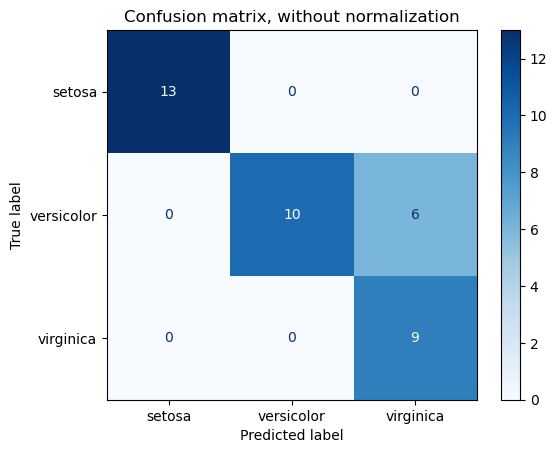

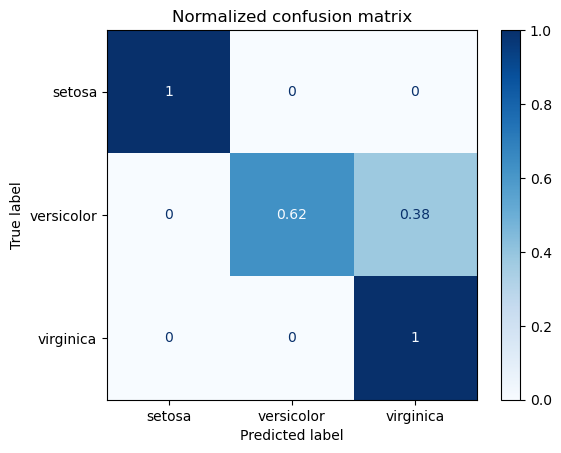

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
